# Project: What does impact in a movie popularity and revenue?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we'll try to understand: what does make a movie successful? What does impact in the revenue? Is it the year? Is it a super star? Is it the popularity? Let's find out!

So first, let's import the necessary libs to our analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section we are going to know our dataset better.

### General Properties

Reading the dataset:

In [2]:
df = pd.read_csv('tmdb-movies.csv')

Let's see which columns the dataset has

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

And how about the data? Let's take a look at a couple of them

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


And do we have duplicates?

In [5]:
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

As we can see we have a total of 10,866 rows and 21 columns, being one line duplicated.

We have some useless information here. They are:
- `imdb_id`
- `original_title`
- `tagline`
- `overview`
- `runtime` (we won't use it for our anylisis because the values are too close)

I won't drop the `id` because it can be usefull for future analysis.

I don't think the `homepage` information is useless. It could tell us something, like: Does having a homepage impact the revenue?


We have missing data, though. The columns with missing data are:
- `cast`
- `homepage`
- `director`
- `tagline`
- `overview`
- `runtime`
- `genres`
- `production_companies`


We have columns using the wrong data type:
- `release_date`


We have columns which are trying to tell us the same thing, but in different measures. In the dataset description it says:

> The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

So the `budget` and `revenue` columns are "duplicated" to our research, we could the drop the columns to adjusted to the infaltion and make a fairer analysis.


We also have composite data in some columns! It'd be nice to have them separated in other datasets for further analysis. The columns are:
- `cast`
- `genres`
- `director`
- `production_companies`
- `key_words`

### Data Cleaning 

Now let's use what we already learned from our dataset to clean it and make it a better dataset to search.

#### 1. Let's drop de duplicated data

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    10865
dtype: int64

#### 2. Let's drop the useless rows


In [7]:
df.drop(['imdb_id', 'original_title', 'tagline', 'overview', 'budget', 'revenue', 'runtime'], axis=1, errors='ignore', inplace=True)
df.head()

,id,popularity,cast,homepage,director,keywords,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### 3. Let's handle the missing data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
keywords                9372 non-null object
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(3), object(7)
memory usage: 1.2+ MB


Well, movies without `cast`, `director` or `genres` aren't useful for us. Let's drop them. 

In [9]:
df.dropna(subset=['cast', 'director', 'genres'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
cast                    10731 non-null object
homepage                2893 non-null object
director                10731 non-null object
keywords                9306 non-null object
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj              10731 non-null float64
revenue_adj             10731 non-null float64
dtypes: float64(4), int64(3), object(7)
memory usage: 1.2+ MB


Let's assume that movies without `production_companies` are movies produced by independent producers, better know by indie. So we are going to fill the nulls with indie to indentify these indie movies.

In [10]:
df.fillna(value={'production_companies': 'indie'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
cast                    10731 non-null object
homepage                2893 non-null object
director                10731 non-null object
keywords                9306 non-null object
genres                  10731 non-null object
production_companies    10731 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj              10731 non-null float64
revenue_adj             10731 non-null float64
dtypes: float64(4), int64(3), object(7)
memory usage: 1.2+ MB


The `homepage` info itself is not really useful for us. We just need to know if the movie has a homepage or not. Let's change the values then:
- `yes` if it has a homepage
- `no` if it doesn't have a homepage

In [11]:
df.loc[df['homepage'].notnull(), 'homepage'] = 'yes'

df.fillna(value={'homepage': 'no'}, inplace=True)

df['homepage'].value_counts()

no     7838
yes    2893
Name: homepage, dtype: int64

#### 4. Handling the release date

Actually the `release_date` isn't really useful too. The useful data for us is: was it released at the beginning or end of the month? What month was it? So let's extract those informations!

First let's find if the movie was released in the first half of the month

In [12]:
def is_it_month_first_half (value):
    """
        Takes a date string and verifies if it's in the first half of the month or not
        Args:
            value: date in format M/D/Y
        Returns:
            Yes if it's in the first half or no if not
    """
    
    day = int(value.split('/')[1])
    if day <= 15:
        return 'yes'
    else:
        return 'no'

df['month_first_half'] = df['release_date'].apply(is_it_month_first_half)

df['month_first_half'].value_counts()

yes    5619
no     5112
Name: month_first_half, dtype: int64

Let's find what month was the month released

In [13]:
df['release_month'] = df['release_date'].apply(lambda x: int(x.split('/')[0]))
df['release_month'].value_counts()

9     1319
10    1138
12     974
8      906
1      892
6      822
3      813
5      807
11     798
4      791
7      790
2      681
Name: release_month, dtype: int64

Now we can drop the `release_date` column since it's useless for us

In [14]:
df.drop(['release_date'], axis=1, inplace=True, errors='ignore')

So now our dataset looks like this:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 15 columns):
id                      10731 non-null int64
popularity              10731 non-null float64
cast                    10731 non-null object
homepage                10731 non-null object
director                10731 non-null object
keywords                9306 non-null object
genres                  10731 non-null object
production_companies    10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj              10731 non-null float64
revenue_adj             10731 non-null float64
month_first_half        10731 non-null object
release_month           10731 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


In [16]:
df.head()

,id,popularity,cast,homepage,director,keywords,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,month_first_half,release_month
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,yes,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6
1,76341,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,yes,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,yes,5
2,262500,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,yes,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,no,3
3,140607,11.173104,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,yes,J.J. Abrams,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,yes,12
4,168259,9.335014,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,yes,James Wan,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,yes,4


#### 5. Spliting the agregate data

We are now going to split our aggregate data into separated dataframes for future analysis. I'll follow the same process for all the dataframes.

1. Split the data into a Series 

    ```python
        x = df['x'].str.split('|').apply(pd.Series,1).stack()
    ```
    
2. When we call `stack` it adds a new level of indexing, which we don't need. So let's drop that level
    
    ```python
        x.index.droplevel(-1)
    ```
    
3. Let's change the Series name to something which won't conflict with an already existent column at our dataframe
    
    ```python
        x.name = 'x_sep'
    ```
    
4. Now we can join our DataFrame with the created Series. It will work because we kept the same index which the DataFrame has (thanks to step 2)
    
    ```python
        df_x = df.join(x)
    ```
    
5. We can drop the older aggregated column

    ```python
        df_x.drop('x', axis=1, inplace=True)
    ```
    
6. Rename the new column to whatever we want

    ```python
        df_x.rename({'x_sep': 'x'}, axis=1, inplace=True)
    ```
    
7. Reset the index (We won't loose reference since we kept the the `id` column)
    
    ```python
        df_cast.reset_index(drop=True, inplace=True)
    ```

And that's it!

Note that we have an algorithm here, so let's define function to split our data!

In [17]:
def split_agg_column_into_new_data_series(column, dataframe, sep='|'):
    """
        Split the aggregated data from a column of a dataframe into a new dataframe
        Args:
            column: the column to split
            dataframe: the dataframe containing the data
            sep: the separator which it'll be split on
        Returns:
            The new dataframe containing the split data
    """
    
    new_column = column + '_sep'
    
    series = df[column].str.split(sep).apply(pd.Series,1).stack()
    series.index = series.index.droplevel(-1)
    series.name = new_column
    
    df_new = df.join(series)
    
    df_new.drop(column, axis=1, inplace=True)
    df_new.rename({new_column: column}, axis=1, inplace=True)
    df_new.reset_index(drop=True, inplace=True)
    
    return df_new

Let's apply our new function to the aggregated columns:
- `cast`
- `genres`
- `director`
- `production_companies`
- `key_words`

We are going to drop the useless columns for the splitted dataframes too. For example, It doesn't matter the aggregated keywords in the separeted cast dataframe!

In [18]:
df_cast = split_agg_column_into_new_data_series('cast', df)
df_cast.drop(['director', 'genres', 'production_companies', 'keywords'], axis=1, inplace=True)
df_cast.head(3)

,id,popularity,homepage,vote_count,vote_average,release_year,budget_adj,revenue_adj,month_first_half,release_month,cast
0,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,Chris Pratt
1,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,Bryce Dallas Howard
2,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,Irrfan Khan


In [19]:
df_genres = split_agg_column_into_new_data_series('genres', df)
df_genres.drop(['director', 'cast', 'production_companies', 'keywords'], axis=1, inplace=True)
df_genres.head(3)

,id,popularity,homepage,vote_count,vote_average,release_year,budget_adj,revenue_adj,month_first_half,release_month,genres
0,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,Action
1,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,Adventure
2,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,Science Fiction


In [20]:
df_director = split_agg_column_into_new_data_series('director', df)
df_director.drop(['cast', 'genres', 'production_companies', 'keywords'], axis=1, inplace=True)
df_director.head(3)

,id,popularity,homepage,vote_count,vote_average,release_year,budget_adj,revenue_adj,month_first_half,release_month,director
0,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,Colin Trevorrow
1,76341,28.419936,yes,6185,7.1,2015,1.379999e+08,3.481613e+08,yes,5,George Miller
2,262500,13.112507,yes,2480,6.3,2015,1.012000e+08,2.716190e+08,no,3,Robert Schwentke


In [21]:
df_prod_comp = split_agg_column_into_new_data_series('production_companies', df)
df_prod_comp.drop(['director', 'genres', 'cast', 'keywords'], axis=1, inplace=True)
df_prod_comp.head(3)

,id,popularity,homepage,vote_count,vote_average,release_year,budget_adj,revenue_adj,month_first_half,release_month,production_companies
0,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,Universal Studios
1,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,Amblin Entertainment
2,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,Legendary Pictures


In [22]:
df_keywords = split_agg_column_into_new_data_series('keywords', df)
df_keywords.drop(['director', 'genres', 'production_companies', 'cast'], axis=1, inplace=True)
df_keywords.head(3)

,id,popularity,homepage,vote_count,vote_average,release_year,budget_adj,revenue_adj,month_first_half,release_month,keywords
0,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,monster
1,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,dna
2,135397,32.985763,yes,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6,tyrannosaurus rex


<a id='eda'></a>
## Exploratory Data Analysis


First, let's describe our data to know it better

In [23]:
df.describe()

,id,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000
mean,65201.741869,0.652615,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07,6.832448
std,91470.508056,1.004804,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08,3.434309
min,5.000000,0.000188,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,10547.500000,0.210765,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000
50%,20323.000000,0.387081,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000
75%,73948.500000,0.720889,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07,10.000000
max,417859.000000,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000


Which are the most popular movies?

In [24]:
most_popular_movies = df.query('popularity > 0.720889')
most_popular_movies_ids = most_popular_movies['id']

most_popular_movies.sort_values('popularity', ascending=False).head(5)

,id,popularity,cast,homepage,director,keywords,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,month_first_half,release_month
0,135397,32.985763,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,yes,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,yes,6
1,76341,28.419936,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,yes,George Miller,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,yes,5
629,157336,24.949134,Matthew McConaughey|Jessica Chastain|Anne Hath...,yes,Christopher Nolan,saving the world|artificial intelligence|fathe...,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,6498,8.0,2014,1.519800e+08,5.726906e+08,yes,11
630,118340,14.311205,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,yes,James Gunn,marvel comic|spaceship|space|scene during end ...,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,5612,7.9,2014,1.565855e+08,7.122911e+08,no,7
2,262500,13.112507,Shailene Woodley|Theo James|Kate Winslet|Ansel...,yes,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,no,3


Which are the most profitable movies?

In [25]:
most_profitable_movies = df.query('revenue_adj > 3.470546e+07')
most_profitable_movies_ids = most_profitable_movies['id']

most_profitable_movies.sort_values('revenue_adj', ascending=False).head(5)

,id,popularity,cast,homepage,director,keywords,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,month_first_half,release_month
1386,19995,9.432768,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,yes,James Cameron,culture clash|future|space war|space colony|so...,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2.408869e+08,2.827124e+09,yes,12
1329,11,12.037933,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,yes,George Lucas,android|galaxy|hermit|death star|lightsaber,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.9,1977,3.957559e+07,2.789712e+09,no,3
5231,597,4.355219,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,yes,James Cameron,shipwreck|iceberg|ship|panic|titanic,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997,2.716921e+08,2.506406e+09,no,11
10594,9552,2.010733,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,yes,William Friedkin,exorcism|holy water|religion and supernatural|...,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1113,7.2,1973,3.928928e+07,2.167325e+09,no,12
9806,578,2.563191,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,yes,Steven Spielberg,fishing|atlantic ocean|bathing|shipwreck|polic...,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1415,7.3,1975,2.836275e+07,1.907006e+09,no,6


### Are popular movies profitable?

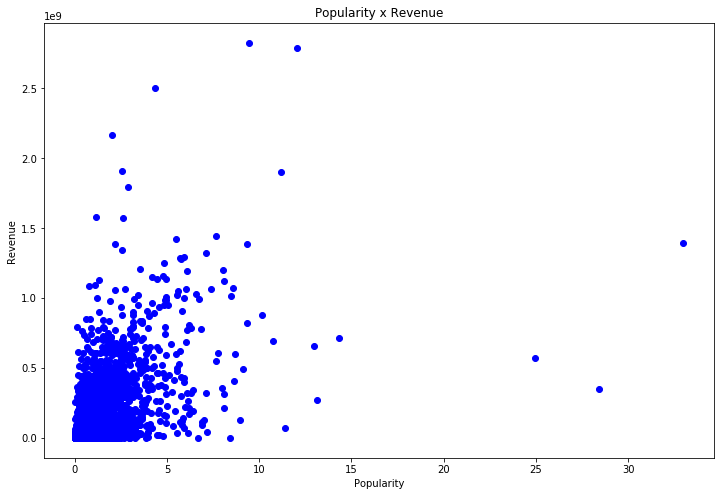

In [26]:
plt.figure(figsize=(12, 8));
plt.title('Popularity x Revenue');
plt.xlabel('Popularity');
plt.ylabel('Revenue');
plt.plot(df['popularity'], df['revenue_adj'], 'bo');

We can see that most unpopular movies have low revenue, but the inverse is not true! We have popular movies with low revenue and vice versa

### Does the budget makes a movie popular?

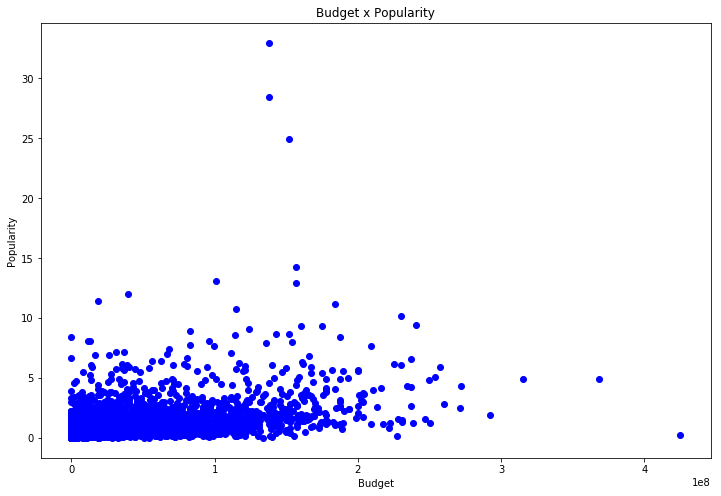

In [27]:
plt.figure(figsize=(12, 8));
plt.title('Budget x Popularity');
plt.xlabel('Budget');
plt.ylabel('Popularity');
plt.plot(df['budget_adj'], df['popularity'], 'bo');

No, the budget doesn't seems to makes a movie popular!

### Does the budget makes a movie profitable?

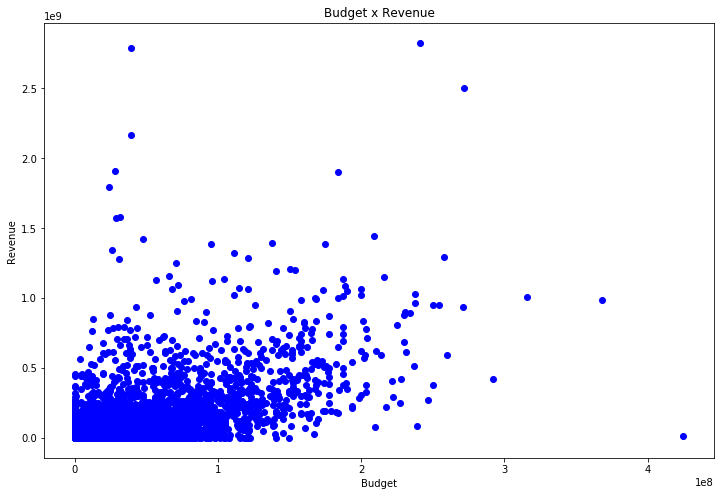

In [28]:
plt.figure(figsize=(12, 8));
plt.title('Budget x Revenue');
plt.xlabel('Budget');
plt.ylabel('Revenue');
plt.plot(df['budget_adj'], df['revenue_adj'], 'bo');

No, the budget doesn't seem to make a movie profitable!

### Does having a homepage impact in the movie popularity?

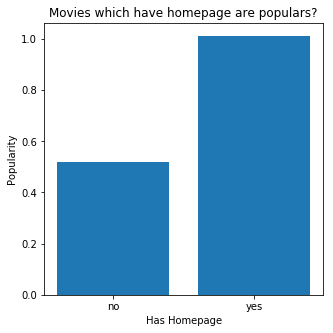

In [29]:
df_homepage = df.groupby('homepage')['popularity'].mean()
plt.figure(figsize=(5, 5));
plt.title('Movies which have homepage are populars?');
plt.xlabel('Has Homepage');
plt.ylabel('Popularity');
plt.bar(df_homepage.index, df_homepage);

If you compare with the max popularity, the difference between having a homepage and not having one is so slight that we can say: no it doesn't impact.

### Have a homepage impacts in the movie revenue?

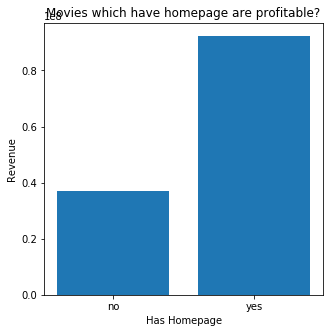

In [30]:
df_homepage = df.groupby('homepage')['revenue_adj'].mean()
plt.figure(figsize=(5, 5));
plt.title('Movies which have homepage are profitable?');
plt.xlabel('Has Homepage');
plt.ylabel('Revenue');
plt.bar(df_homepage.index, df_homepage);

If you compare with the max revenue, the difference between to have and not a homepage is so slight that we can say: no it doesn't impact.

### Is the year relevant to the movie popularity?

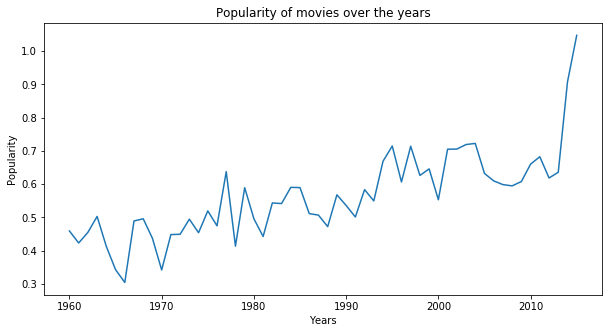

In [31]:
df_year = df.groupby('release_year')['popularity'].mean()
plt.figure(figsize=(10, 5));
plt.title('Popularity of movies over the years');
plt.xlabel('Years');
plt.ylabel('Popularity');
plt.plot(df_year.index, df_year);

Yes! Movies seems to be getting more popular over the years!

### Is the year relevant to the movie revenue?

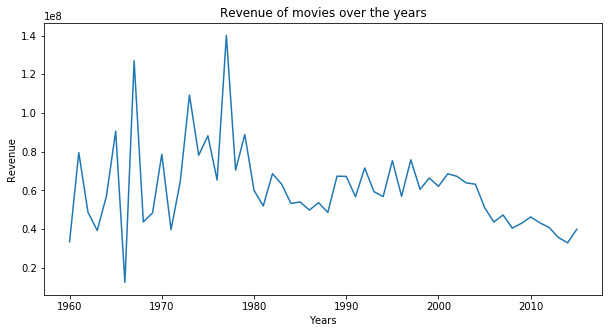

In [32]:
df_year = df.groupby('release_year')['revenue_adj'].mean()
plt.figure(figsize=(10, 5));
plt.title('Revenue of movies over the years');
plt.xlabel('Years');
plt.ylabel('Revenue');
plt.plot(df_year.index, df_year);

No, the years doesn't seem to be a fact which impacts in the revenue (adjusted by the inflaction)

### Does the release month impact in the movie popularity?

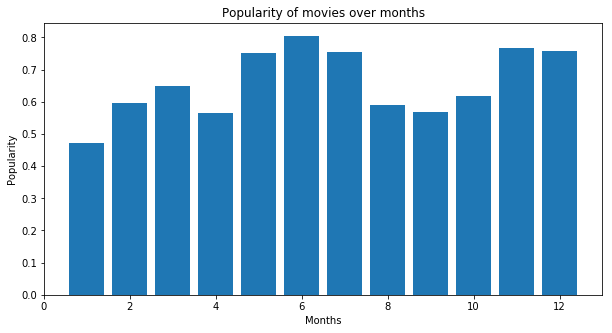

In [33]:
df_month = df.groupby('release_month')['popularity'].mean()
plt.figure(figsize=(10, 5));
plt.title('Popularity of movies over months');
plt.xlabel('Months');
plt.ylabel('Popularity');
plt.bar(df_month.index, df_month);

It seems that movies released at the middle of the year are slightly more popular

### Does the release month impact in the movie revenue?

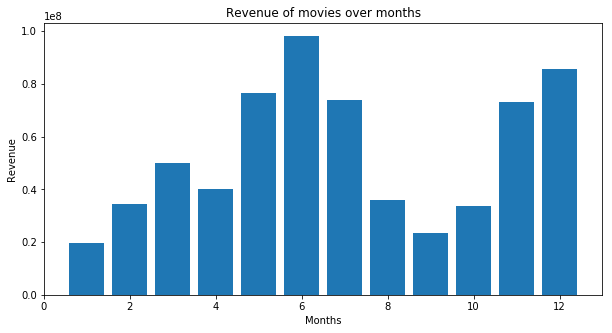

In [34]:
df_month = df.groupby('release_month')['revenue_adj'].mean()
plt.figure(figsize=(10, 5));
plt.title('Revenue of movies over months');
plt.xlabel('Months');
plt.ylabel('Revenue');
plt.bar(df_month.index, df_month);

The revenue follows the same pattern as the popularity. Release movies by May, June and July is a good deal!

### Does releasing a movie in the first half of the month impact in the movie popularity?

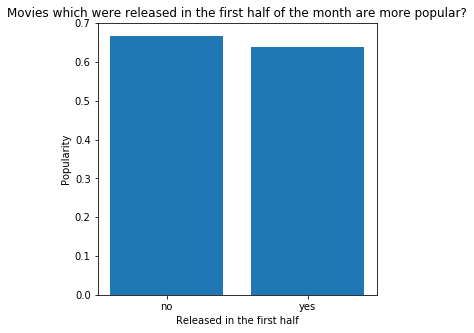

In [35]:
df_released_first_half = df.groupby('month_first_half')['popularity'].mean()
plt.figure(figsize=(5, 5));
plt.title('Movies which were released in the first half of the month are more popular?');
plt.xlabel('Released in the first half');
plt.ylabel('Popularity');
plt.bar(df_released_first_half.index, df_released_first_half);

No it doesn't impact

### Is there a relation between the movie popularity and the votes count in the mdb?

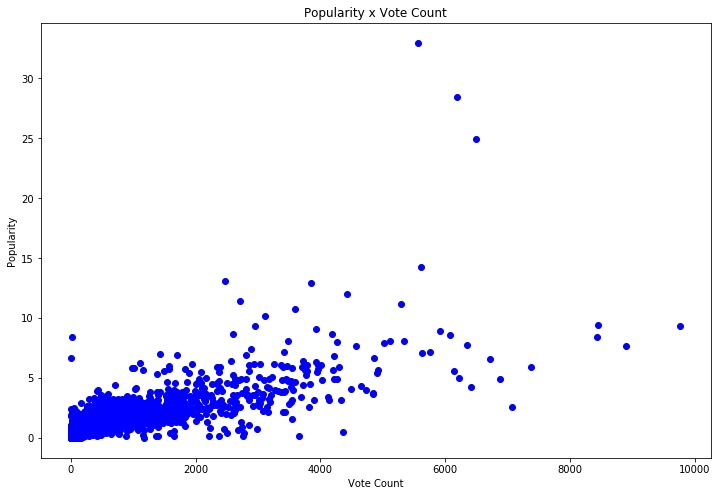

In [36]:
plt.figure(figsize=(12, 8));
plt.title('Popularity x Vote Count');
plt.xlabel('Vote Count');
plt.ylabel('Popularity');
plt.plot(df['vote_count'], df['popularity'], 'bo');

The is a relation between popularity and vote count!

### Is there a relation between the movie popularity and the votes average in the mdb?

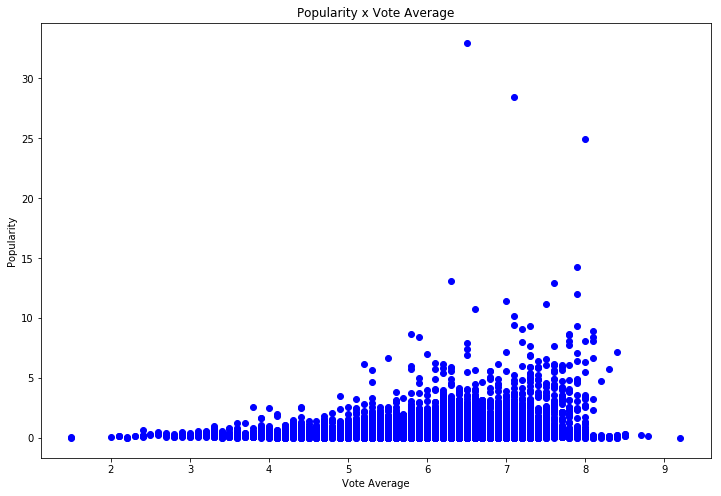

In [37]:
plt.figure(figsize=(12, 8));
plt.title('Popularity x Vote Average');
plt.xlabel('Vote Average');
plt.ylabel('Popularity');
plt.plot(df['vote_average'], df['popularity'], 'bo');

Movies with higher vote average seem to be more popular!

### Does a superstar impact in a movie popularity?

In [38]:
most_popular_movies_indexes_cast = df_cast.index[np.in1d(df_cast['id'], most_popular_movies_ids)]
top_popular_movies_cast = df_cast.loc[most_popular_movies_indexes_cast]

#### Which actors appear more in popular movies?

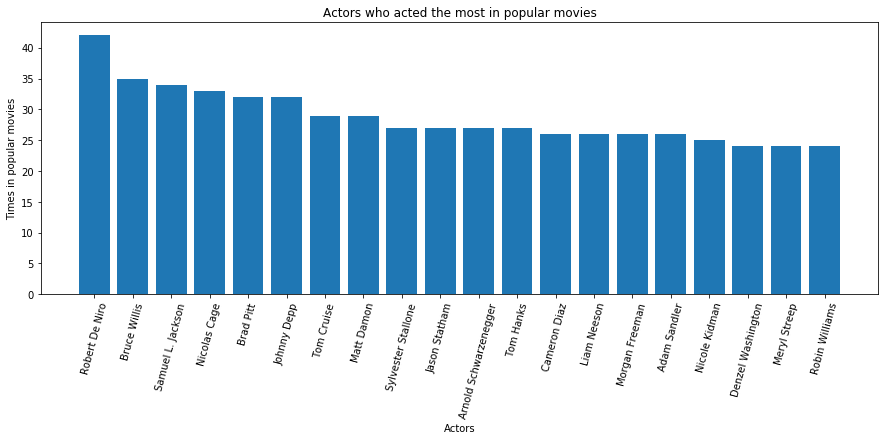

In [39]:
top_cast = top_popular_movies_cast['cast'].value_counts().head(20)

plt.figure(figsize=(15, 5));
plt.title('Actors who acted the most in popular movies');
plt.xticks(rotation=75);
plt.ylabel('Times in popular movies');
plt.xlabel('Actors');
plt.bar(top_cast.index, top_cast);

#### Which actors appears in the most popular movies?

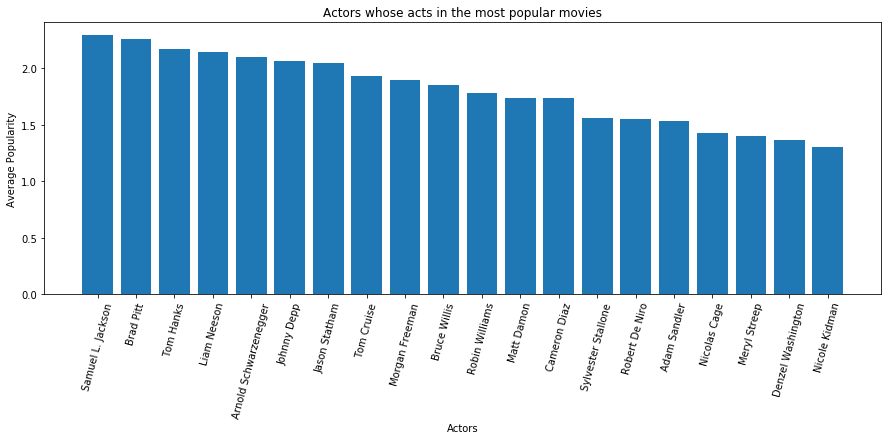

In [40]:
most_popular_actors = top_popular_movies_cast[top_popular_movies_cast['cast'].isin(top_cast.index)]
popular_actors = most_popular_actors.groupby('cast')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5));
plt.title('Actors whose acts in the most popular movies');
plt.xticks(rotation=75);
plt.ylabel('Average Popularity');
plt.xlabel('Actors');
plt.bar(popular_actors.index, popular_actors);

### Does a superstar impacts in a movie revenue?


In [41]:
most_profitable_movies_indexes_cast = df_cast.index[np.in1d(df_cast['id'], most_profitable_movies_ids)]
top_profitable_movies_cast = df_cast.loc[most_profitable_movies_indexes_cast]
top_profitable_movies_cast.shape

(13413, 11)

#### Which actors appears more in profitable movies?

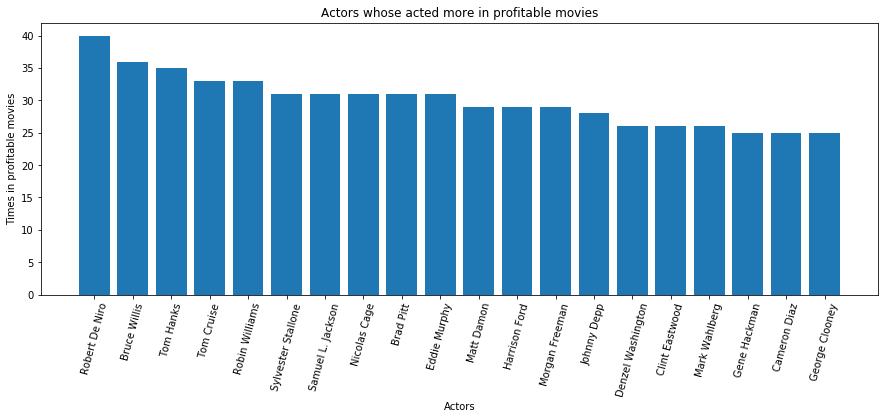

In [42]:
top_prof_cast = top_profitable_movies_cast['cast'].value_counts().head(20)

plt.figure(figsize=(15, 5));
plt.title('Actors whose acted more in profitable movies');
plt.xticks(rotation=75);
plt.ylabel('Times in profitable movies');
plt.xlabel('Actors');
plt.bar(top_prof_cast.index, top_prof_cast);

#### Which actors acted in the most profitable movies?

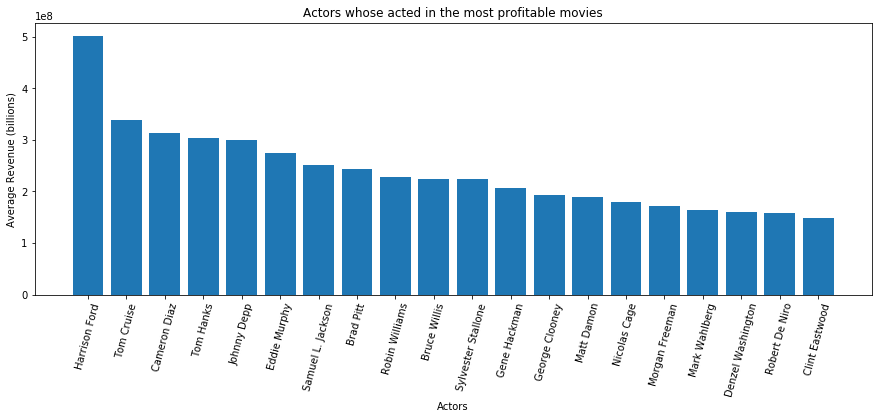

In [43]:
most_prof_actors = top_profitable_movies_cast[top_profitable_movies_cast['cast'].isin(top_prof_cast.index)]
profitable_actors = most_prof_actors.groupby('cast')['revenue_adj'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5));
plt.title('Actors whose acted in the most profitable movies');
plt.xticks(rotation=75);
plt.ylabel('Average Revenue (billions)');
plt.xlabel('Actors');
plt.bar(profitable_actors.index, profitable_actors);

### Does a genre impacts in a movie popularity?

In [44]:
most_popular_movies_indexes_genres = df_genres.index[np.in1d(df_genres['id'], most_popular_movies_ids)]
top_popular_movies_genres = df_genres.loc[most_popular_movies_indexes_genres]
top_popular_movies_genres.shape

(7324, 11)

#### Which genres appears most in popular movies?

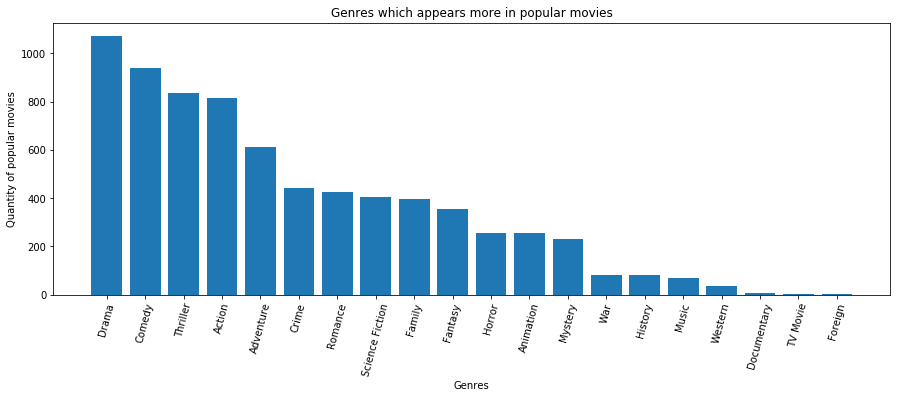

In [45]:
top_genres = top_popular_movies_genres['genres'].value_counts().head(20)

plt.figure(figsize=(15, 5));
plt.title('Genres which appears more in popular movies');
plt.xticks(rotation=75);
plt.ylabel('Quantity of popular movies');
plt.xlabel('Genres');
plt.bar(top_genres.index, top_genres);

#### Which genres has more impact in the movies popularity?

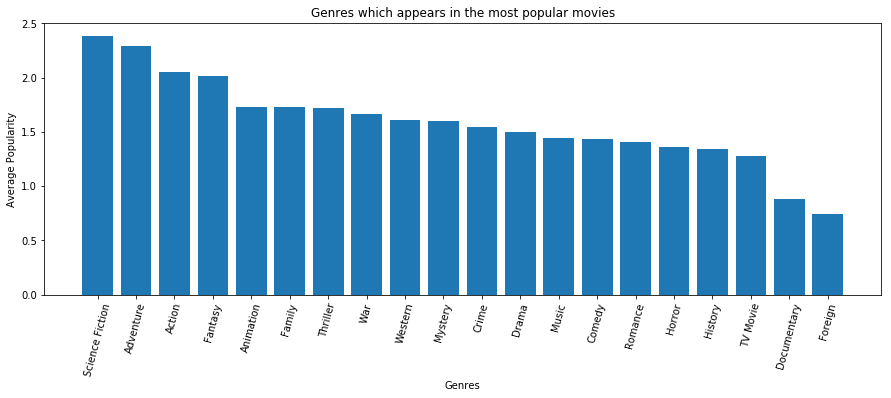

In [46]:
most_popular_genres = top_popular_movies_genres[top_popular_movies_genres['genres'].isin(top_genres.index)]
popular_genres = most_popular_genres.groupby('genres')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5));
plt.title('Genres which appears in the most popular movies');
plt.xticks(rotation=75);
plt.ylabel('Average Popularity');
plt.xlabel('Genres');
plt.bar(popular_genres.index, popular_genres);

### Does a genre impacts in a movie revenue?

In [47]:
most_profitable_movies_indexes_genres = df_genres.index[np.in1d(df_genres['id'], most_profitable_movies_ids)]
top_profitable_movies_genres = df_genres.loc[most_profitable_movies_indexes_genres]
top_profitable_movies_genres.shape

(7384, 11)

#### Which genres has more profitable movies?

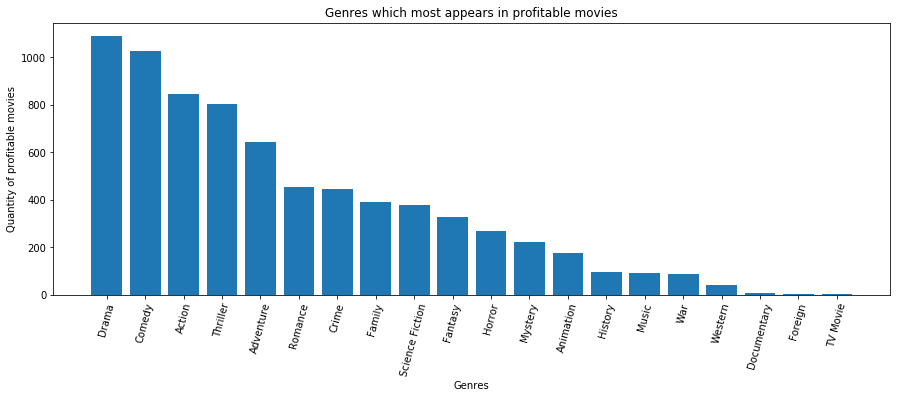

In [48]:
top_prof_genres = top_profitable_movies_genres['genres'].value_counts().head(20)

plt.figure(figsize=(15, 5));
plt.title('Genres which most appears in profitable movies');
plt.xticks(rotation=75);
plt.ylabel('Quantity of profitable movies');
plt.xlabel('Genres');
plt.bar(top_prof_genres.index, top_prof_genres);

#### Which genres has the most profitable movies?

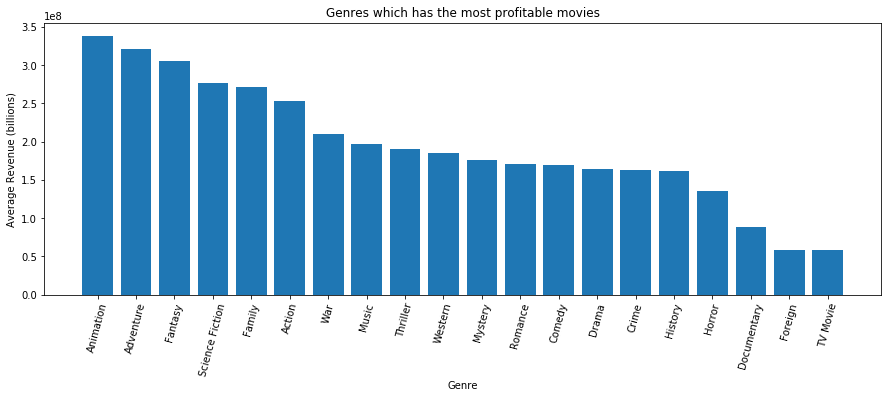

In [49]:
most_prof_genres = top_profitable_movies_genres[top_profitable_movies_genres['genres'].isin(top_prof_genres.index)]
profitable_genres = most_prof_genres.groupby('genres')['revenue_adj'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5));
plt.title('Genres which has the most profitable movies');
plt.xticks(rotation=75);
plt.ylabel('Average Revenue (billions)');
plt.xlabel('Genre');
plt.bar(profitable_genres.index, profitable_genres);

### Does a director impacts in a movie popularity?

In [50]:
most_popular_movies_indexes_director = df_director.index[np.in1d(df_director['id'], most_popular_movies_ids)]
top_popular_movies_director = df_director.loc[most_popular_movies_indexes_director]
top_popular_movies_director.shape

(2952, 11)

#### Which directors have more popular movies?

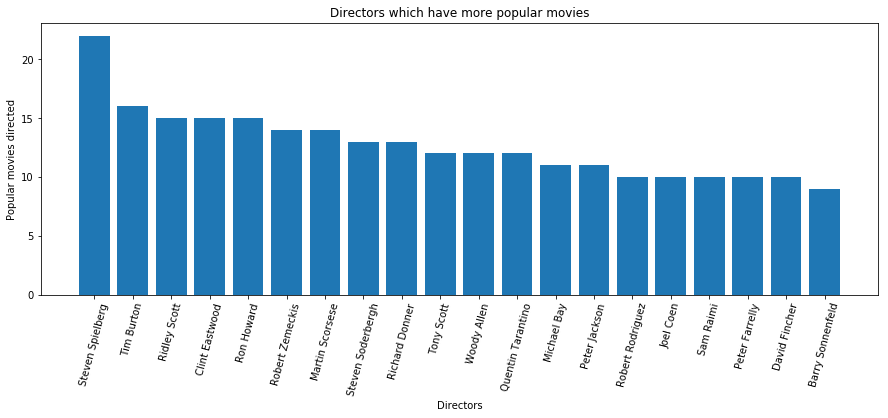

In [51]:
top_director = top_popular_movies_director['director'].value_counts().head(20)

plt.figure(figsize=(15, 5));
plt.title('Directors which have more popular movies');
plt.xticks(rotation=75);
plt.ylabel('Popular movies directed');
plt.xlabel('Directors');
plt.bar(top_director.index, top_director);

#### Which directors have the most popular movies?

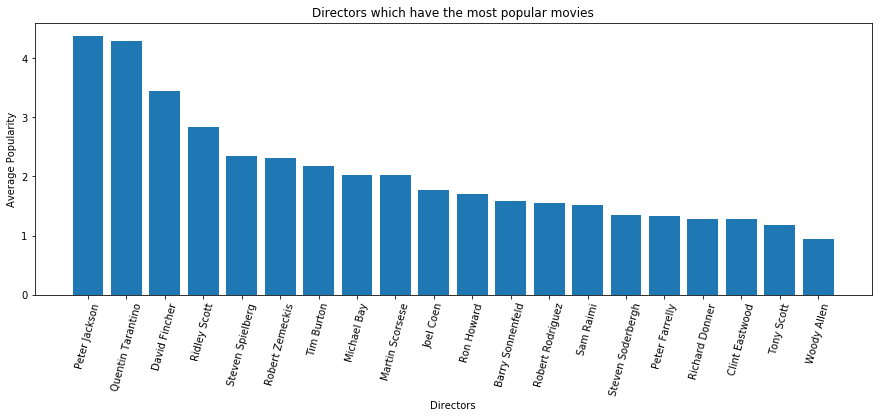

In [52]:
most_popular_director = top_popular_movies_director[top_popular_movies_director['director'].isin(top_director.index)]
popular_director = most_popular_director.groupby('director')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5));
plt.title('Directors which have the most popular movies');
plt.xticks(rotation=75);
plt.ylabel('Average Popularity');
plt.xlabel('Directors');
plt.bar(popular_director.index, popular_director);

### Does a director impacts in a movie revenue?

In [53]:
most_profitable_movies_indexes_director = df_director.index[np.in1d(df_director['id'], most_profitable_movies_ids)]
top_profitable_movies_director = df_director.loc[most_profitable_movies_indexes_director]
top_profitable_movies_director.shape

(2898, 11)

#### Which directors has more profitable movies?

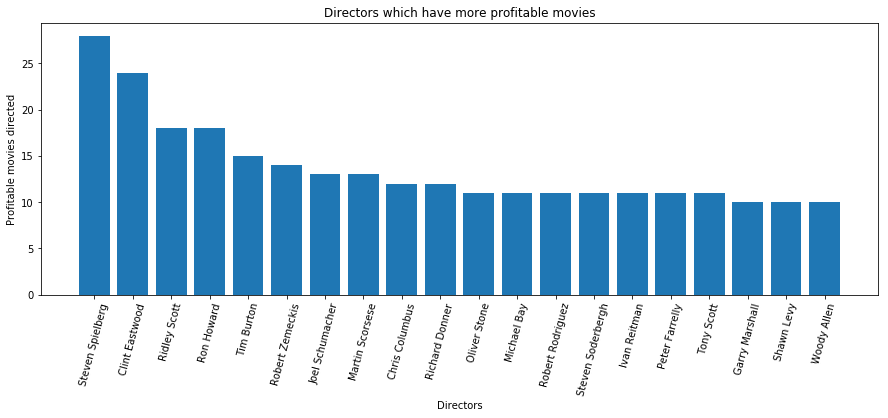

In [54]:
top_prof_director = top_profitable_movies_director['director'].value_counts().head(20)

plt.figure(figsize=(15, 5));
plt.title('Directors which have more profitable movies');
plt.xticks(rotation=75);
plt.ylabel('Profitable movies directed');
plt.xlabel('Directors');
plt.bar(top_prof_director.index, top_prof_director);

#### Which directors have the most profitable movies?

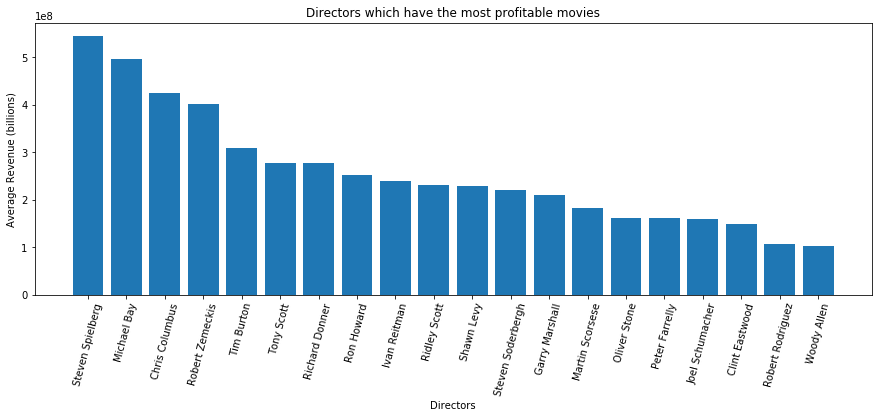

In [55]:
most_prof_director = top_profitable_movies_director[top_profitable_movies_director['director'].isin(top_prof_director.index)]
profitable_director = most_prof_director.groupby('director')['revenue_adj'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5));
plt.title('Directors which have the most profitable movies');
plt.xticks(rotation=75);
plt.ylabel('Average Revenue (billions)');
plt.xlabel('Directors');
plt.bar(profitable_director.index, profitable_director);

### Does a production impact in a movie popularity?

In [56]:
most_popular_movies_indexes_prod_comp = df_prod_comp.index[np.in1d(df_prod_comp['id'], most_popular_movies_ids)]
top_popular_movies_prod_comp = df_prod_comp.loc[most_popular_movies_indexes_prod_comp]
top_popular_movies_prod_comp.shape

(7828, 11)

#### Which production companies have more popular movies?

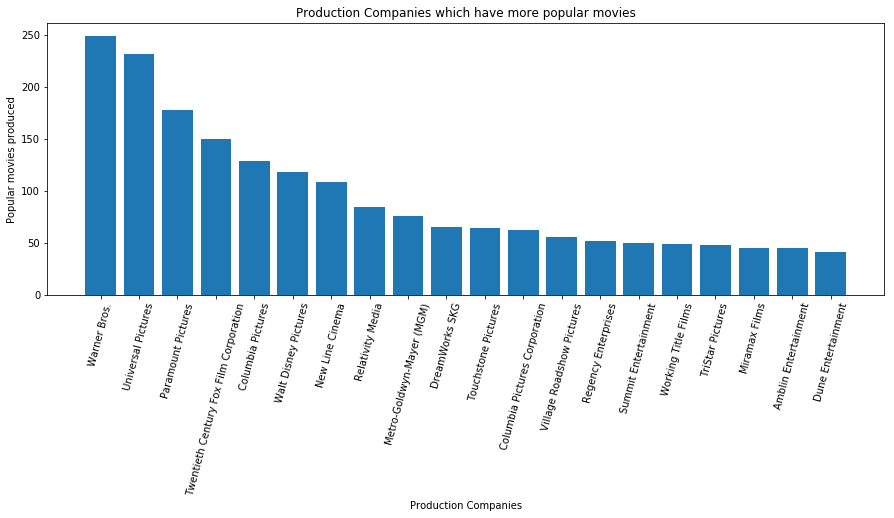

In [57]:
top_prod_comp = top_popular_movies_prod_comp['production_companies'].value_counts().head(20)

plt.figure(figsize=(15, 5));
plt.title('Production Companies which have more popular movies');
plt.xticks(rotation=75);
plt.ylabel('Popular movies produced');
plt.xlabel('Production Companies');
plt.bar(top_prod_comp.index, top_prod_comp);

#### Which Production Companies have the most popular movies?

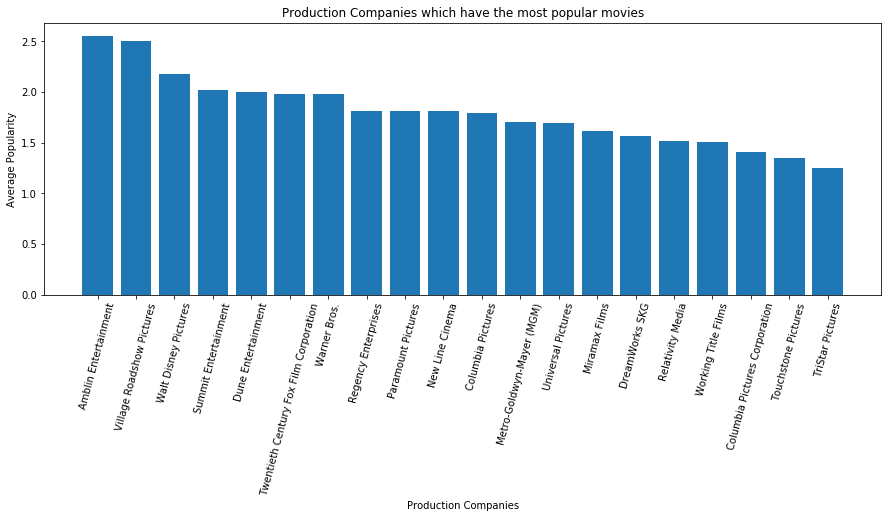

In [58]:
most_popular_prod_comp = top_popular_movies_prod_comp[top_popular_movies_prod_comp['production_companies'].isin(top_prod_comp.index)]
popular_prod_comp = most_popular_prod_comp.groupby('production_companies')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5));
plt.title('Production Companies which have the most popular movies');
plt.xticks(rotation=75);
plt.ylabel('Average Popularity');
plt.xlabel('Production Companies');
plt.bar(popular_prod_comp.index, popular_prod_comp);

### Does a Production Company impact in a movie revenue?

In [59]:
most_profitable_movies_indexes_prod_comp = df_prod_comp.index[np.in1d(df_prod_comp['id'], most_profitable_movies_ids)]
top_profitable_movies_prod_comp = df_prod_comp.loc[most_profitable_movies_indexes_prod_comp]
top_profitable_movies_prod_comp.shape

(7381, 11)

#### Which Production Company has more profitable movies?

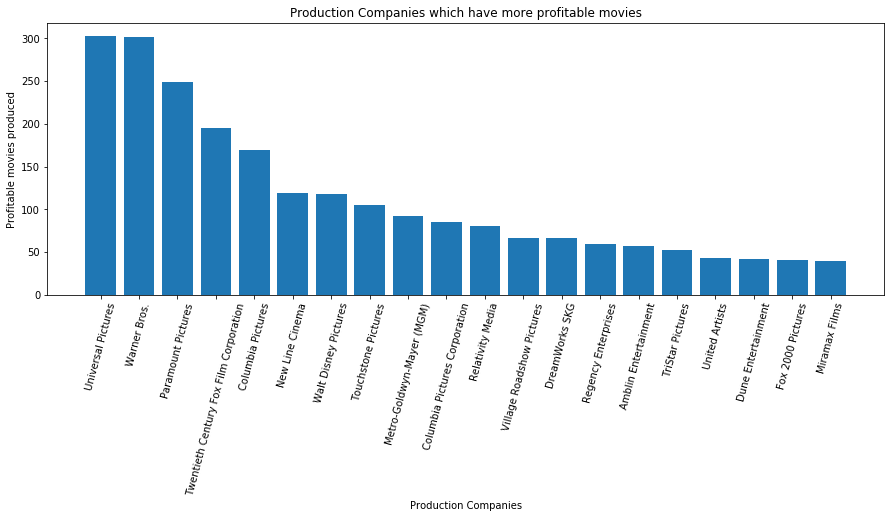

In [60]:
top_prof_prod_comp = top_profitable_movies_prod_comp['production_companies'].value_counts().head(20)

plt.figure(figsize=(15, 5));
plt.title('Production Companies which have more profitable movies');
plt.xticks(rotation=75);
plt.ylabel('Profitable movies produced');
plt.xlabel('Production Companies');
plt.bar(top_prof_prod_comp.index, top_prof_prod_comp);

#### Which production companies have the most profitable mvoies?

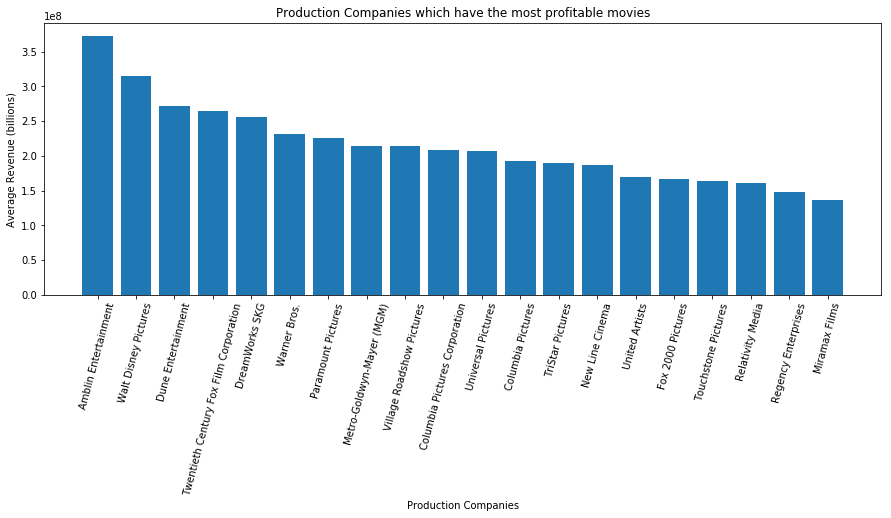

In [61]:
most_prof_prod_comp = top_profitable_movies_prod_comp[top_profitable_movies_prod_comp['production_companies'].isin(top_prof_prod_comp.index)]
profitable_prod_comp = most_prof_prod_comp.groupby('production_companies')['revenue_adj'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5));
plt.title('Production Companies which have the most profitable movies');
plt.xticks(rotation=75);
plt.ylabel('Average Revenue (billions)');
plt.xlabel('Production Companies');
plt.bar(profitable_prod_comp.index, profitable_prod_comp);

### Does a keyword impact in the movie popularity?

In [62]:
most_popular_movies_indexes_keywords = df_keywords.index[np.in1d(df_keywords['id'], most_popular_movies_ids)]
top_popular_movies_keywords = df_keywords.loc[most_popular_movies_indexes_keywords]
top_popular_movies_keywords.shape

(11871, 11)

#### Which keywords appears in more popular movies?

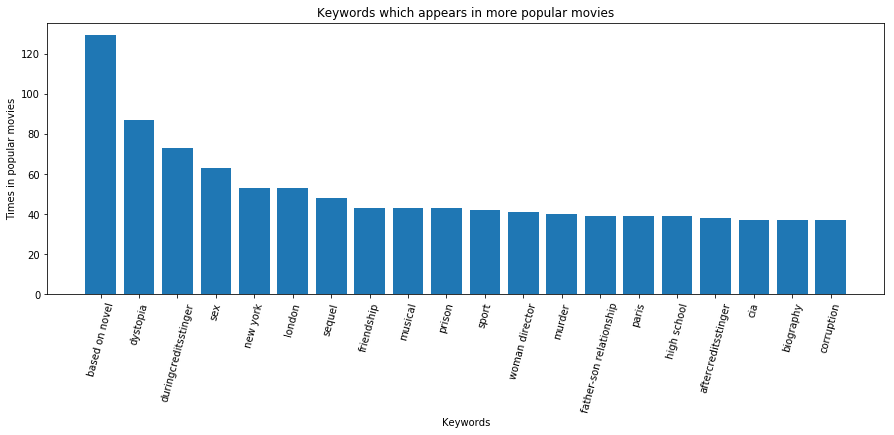

In [63]:
top_keywords = top_popular_movies_keywords['keywords'].value_counts().head(20)

plt.figure(figsize=(15, 5));
plt.title('Keywords which appears in more popular movies');
plt.xticks(rotation=75);
plt.ylabel('Times in popular movies');
plt.xlabel('Keywords');
plt.bar(top_keywords.index, top_keywords);

#### Which keywords appear in the most popular movies?

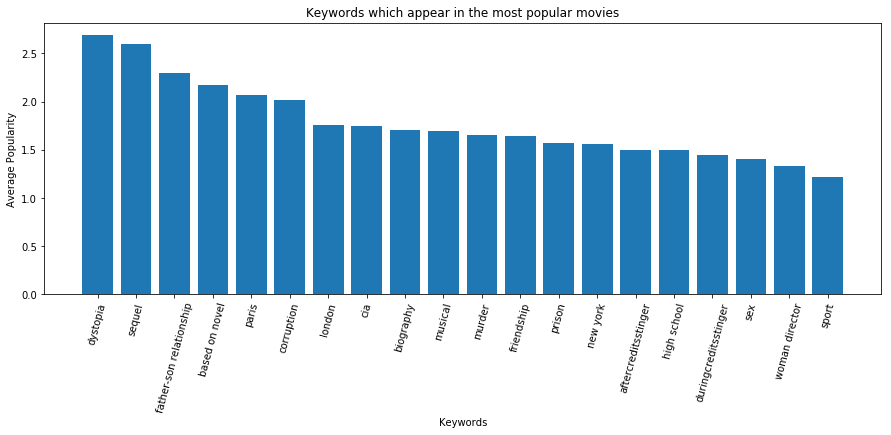

In [64]:
most_popular_keywords = top_popular_movies_keywords[top_popular_movies_keywords['keywords'].isin(top_keywords.index)]
popular_keywords = most_popular_keywords.groupby('keywords')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5));
plt.title('Keywords which appear in the most popular movies');
plt.xticks(rotation=75);
plt.ylabel('Average Popularity');
plt.xlabel('Keywords');
plt.bar(popular_keywords.index, popular_keywords);

### Does a keyword impact in the movie revenue?

In [65]:
most_profitable_movies_indexes_keywords = df_keywords.index[np.in1d(df_keywords['id'], most_profitable_movies_ids)]
top_profitable_movies_keywords = df_keywords.loc[most_profitable_movies_indexes_keywords]
top_profitable_movies_keywords.shape

(12074, 11)

#### Which keywords appears in more profitable movies?

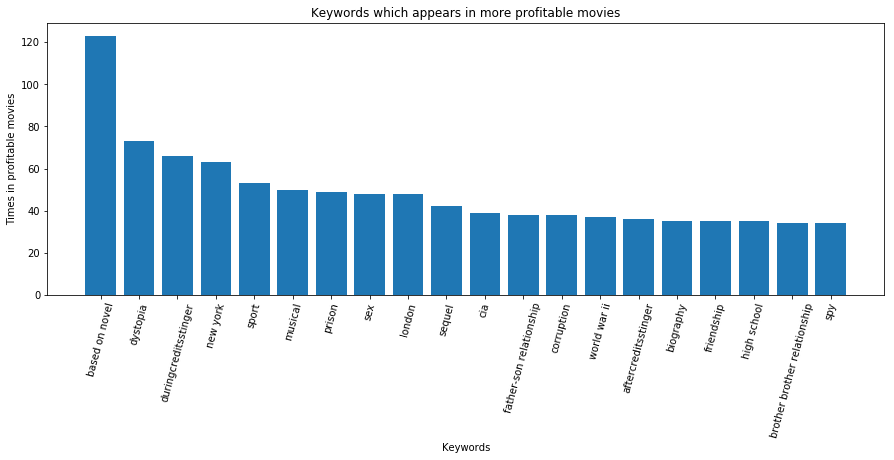

In [66]:
top_prof_keywords = top_profitable_movies_keywords['keywords'].value_counts().head(20)

plt.figure(figsize=(15, 5));
plt.title('Keywords which appears in more profitable movies');
plt.xticks(rotation=75);
plt.ylabel('Times in profitable movies');
plt.xlabel('Keywords');
plt.bar(top_prof_keywords.index, top_prof_keywords);

#### Which keywords appears in the most profitable movies?

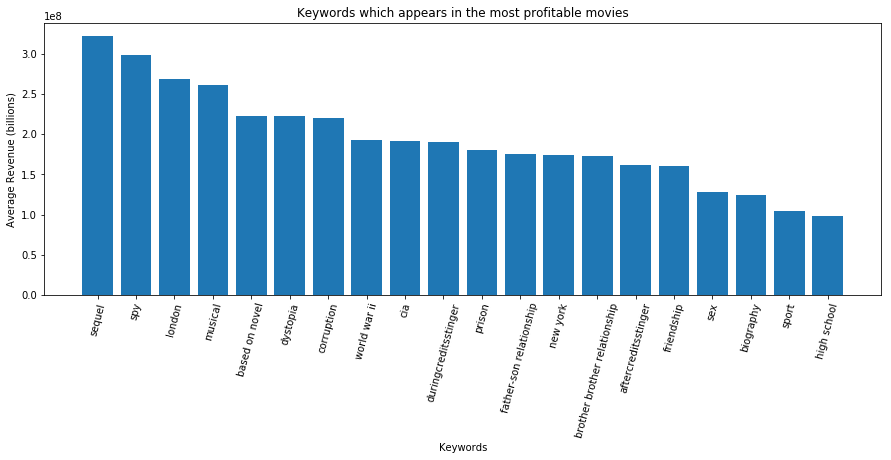

In [67]:
most_prof_keywords = top_profitable_movies_keywords[top_profitable_movies_keywords['keywords'].isin(top_prof_keywords.index)]
profitable_keywords = most_prof_keywords.groupby('keywords')['revenue_adj'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 5));
plt.title('Keywords which appears in the most profitable movies');
plt.xticks(rotation=75);
plt.ylabel('Average Revenue (billions)');
plt.xlabel('Keywords');
plt.bar(profitable_keywords.index, profitable_keywords);

<a id='conclusions'></a>
## Conclusions

- Big budget’s movies aren’t necessary populars or profitable
- A movie can be profitable and not popular at the same time. Actually the most popular movies aren’t the most profitable ones and vice-versa
- Movies are getting more popular over the years, but less profitable (if we adjust to the inflation)
- Release a movie between May and July seems to impact in the movies popularity and revenue
- Popular movies tend to have more votes at ImdB and better vote average
- Actors and Directors seem to impact more in the movie revenue than others factors

- If we would write a receipt for a popular movie, it would be:
    - Cast: 
        - Samuel L. Jackson
        - Brad Pitt
        - Tom Hanks
        - Liam Neeson
        - Arnold Schwarzenegger
    - Genre:
        - Science Fiction
        - Adventure
    - Directed by:
        - Peter Jackson 
        - Quentin Tarantino
    - Produced by:
        - Amblin Entertainment 
        - Village Roadshow Pictures
    - Having the thematic (keyword)
        - Dystopia
        - Sequel


- If we would write a receipt for a profitable movie, it would be:
    - Cast:
        - Staring because he is really profitable: Harrison Ford
        - Tom Cruise
        - Tom Hanks
        - Jhonny Depp
        - Eddie Murphy
    - Genre: Adventure
    - Directed by: Steven Spielberg
    - Produced by: Amblin Entertainment 
    - Having the thematic (keyword)
        - Sequel
        - Spy
        
        
## Limitations of the dataset

The raw dataset contains some null data. That's not a big problem, but it's a limitation to the analysis, since we had to analyse a smaller dataset than the one was provided to us.

A real problem is the lack of some important informations. Like, did the movie win an Oscar? Or, are the movie part of a saga? Those information cerntainly would contribute to the analysis!


# References

The following links were used to make this analysis.

- https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
- https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
- https://stackoverflow.com/questions/38083227/finding-an-array-elements-location-in-a-pandas-frame-column-a-k-a-pd-series
- https://stackoverflow.com/questions/16616141/deleting-all-columns-except-a-few-python-pandas
- https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
- https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.in1d.html